<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/workshop_fine_tune_gpt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=ced8ff6b08fc2c055b3fe027e039ee72a8669bc5f0cfc1714d6a871f2e0a501d
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


# Get Key api
Register and get api key [OpenAI](https://platform.openai.com/account/api-keys)

#Inference original models

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'Key-api'

In [ ]:
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

prompt = "วัดธาตุทอง"

response = openai.Completion.create(
                model="text-davinci-003",
                prompt=prompt,
                temperature=0.89,
                max_tokens=50,
                top_p=1,
                # frequency_penalty=0.1,
                presence_penalty=0.6,
  )

print("prompt :",prompt)
print("output :",response["choices"][0]["text"])

prompt : วัดธาตุทอง
output : ค์ก่อนที่เข้าเป็นพระองค์อ


In [ ]:
!pip install datasets transformers==4.11.2
!pip install sentencepiece

#Dataset 
##Data structure

```{"prompt": "<prompt text>", "completion": "<ideal generated text>"}```

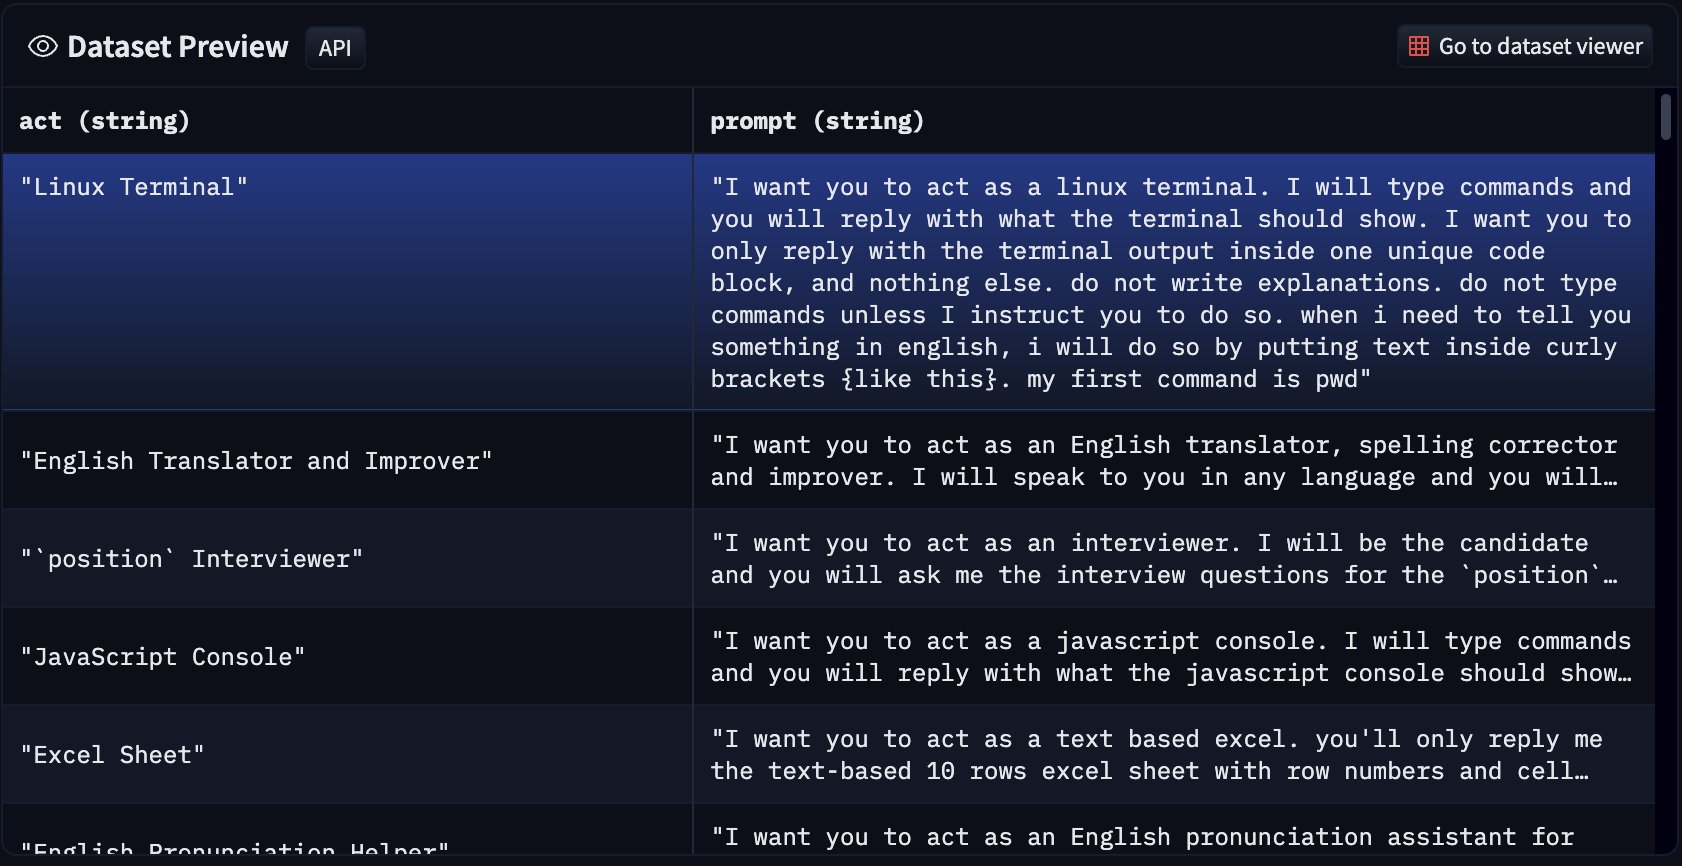

#Example
```
{"prompt": "ร้านอาหาร, กาแฟ", "completion": " ร้านอาหารใหญ่มากกกกกกก เลี้ยวเข้ามาเจอห้องน้ำก่อนเลย เออแปลกดี ห้องทานหลักๆอยู่ชั้น 2 มีกาแฟ น้ำผึ้ง "}
```

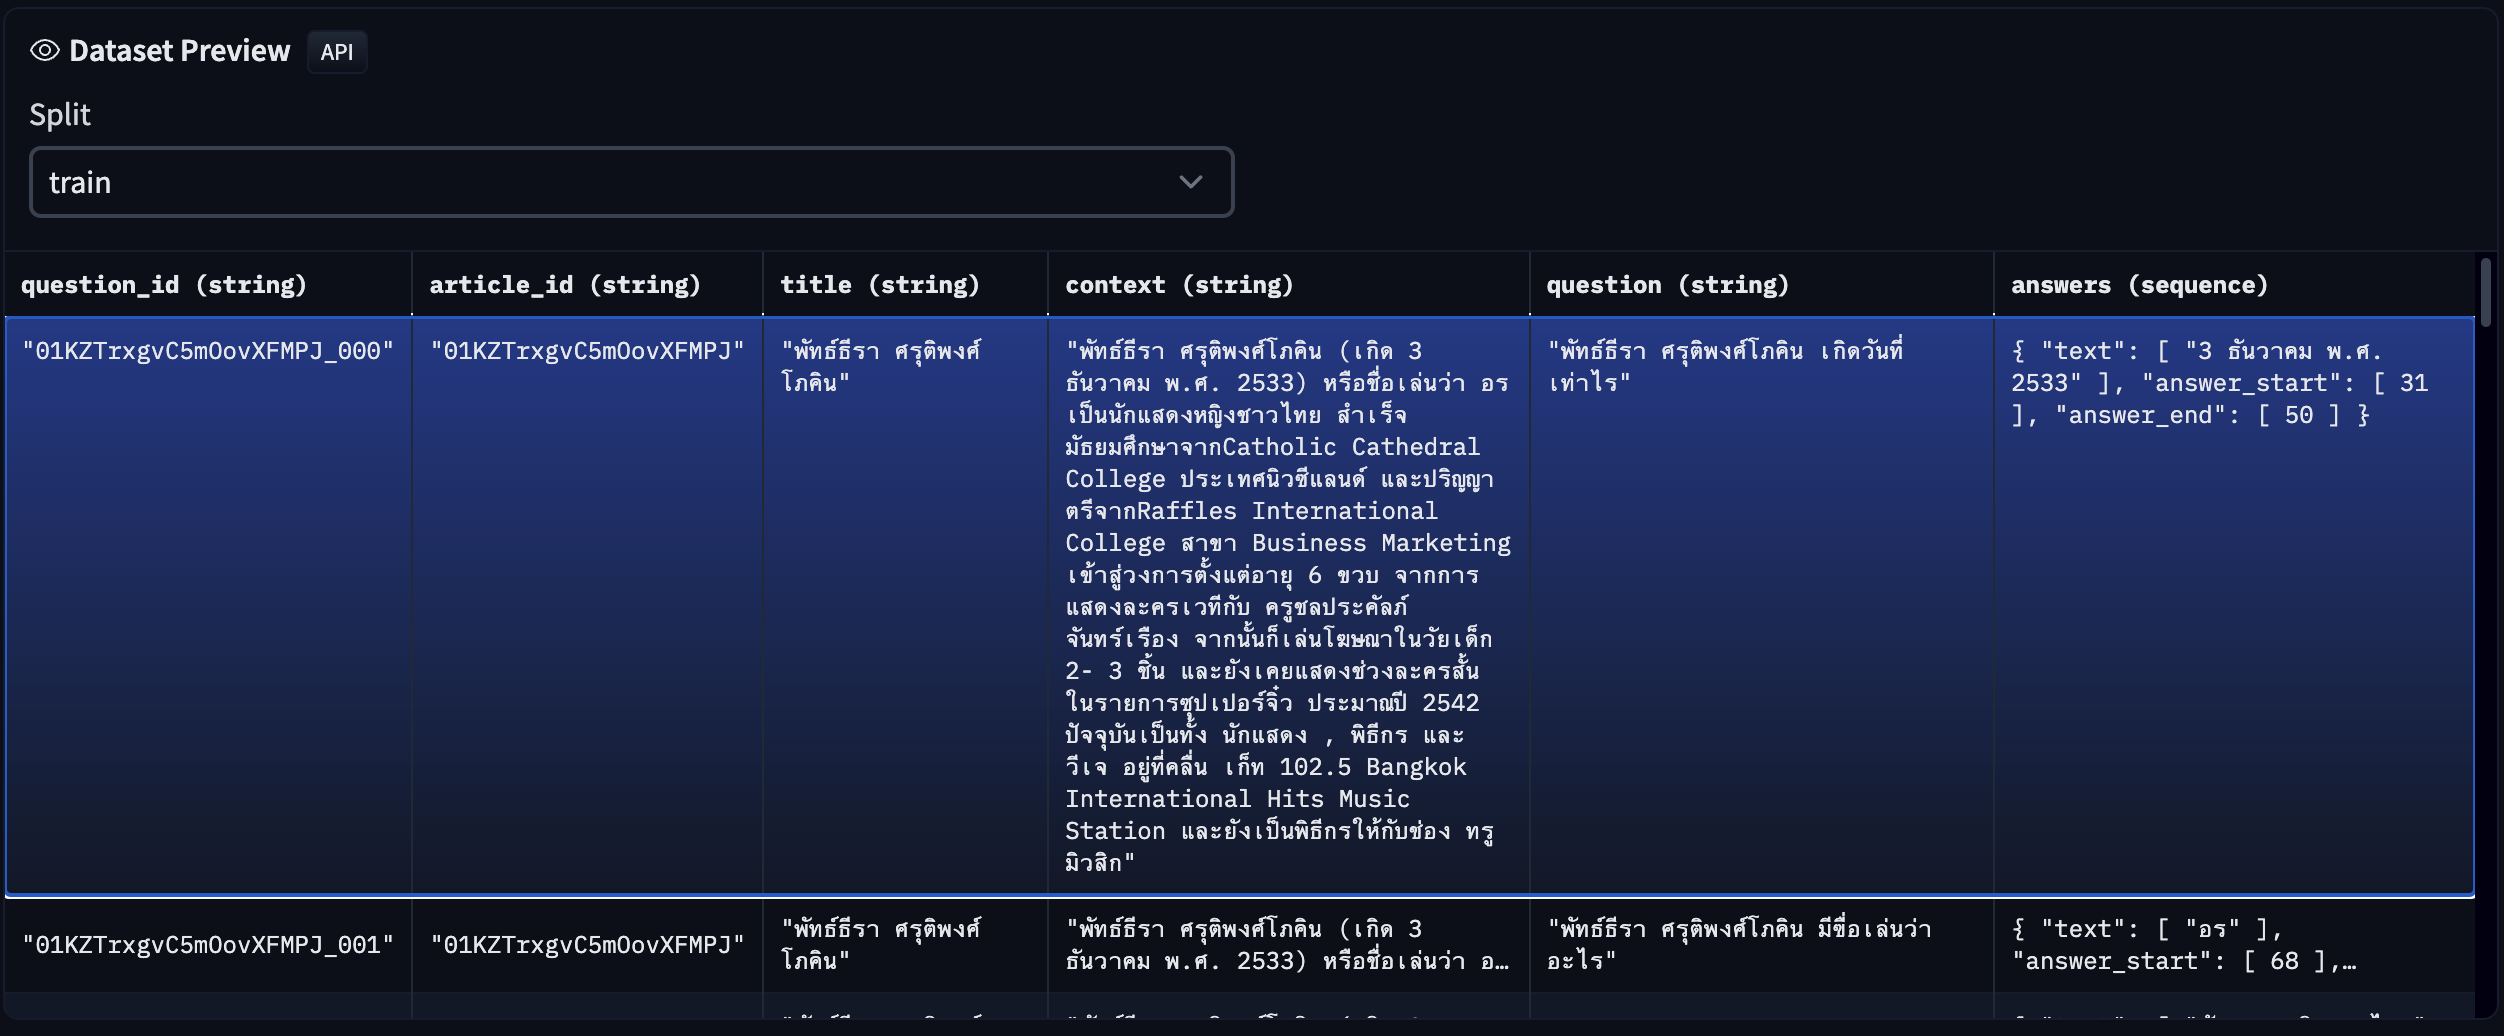

In [ ]:
from datasets import load_dataset

In [ ]:
datasets = load_dataset("iapp_wiki_qa_squad")

  0%|          | 0/3 [00:00<?, ?it/s]

#Data preprocessing

In [ ]:
datasets["train"][0]

In [ ]:
output = []
for i in datasets["train"]:
    print(i)
    prompt = i["question"]
    completion = i["context"]
    line = {'prompt': prompt, 'completion': completion}
    output.append(line)

In [ ]:
from google.colab import files
import json, os

In [ ]:
with open('depression-d.jsonl', 'w') as outfile:
        for i in output:
            json.dump(i, outfile)
            outfile.write('\n')

# Fine tune models

In [ ]:
!openai tools fine_tunes.prepare_data -f '/content/depression-d.jsonl'

In [ ]:
!openai api fine_tunes.create -t "/content/depression-d_prepared.jsonl" -m davinci

In [ ]:
!openai api fine_tunes.follow -i <name id>

#Inference Fine-Tune models

In [ ]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

prompt = "วัดธาตุทอง"

response = openai.Completion.create(
                model="<models name>",
                prompt=prompt,
                temperature=0.89,
                max_tokens=50,
                top_p=1,
                # frequency_penalty=0.1,
                presence_penalty=0.6,
                stop=["\n"]
  )

print("prompt :",prompt)
print("output :",response["choices"][0]["text"])